In [106]:
#Importing Libraries
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Aayush\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [107]:
#Importing dating data
data = pd.read_csv('D:/Dating Data.csv', encoding="ISO-8859-1")

In [108]:
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [109]:
#Grooming data for features
columns=['iid','age','gender','idg','pid','match','samerace','age_o','race_o','dec_o','field_cd','race',\
'imprace','imprelig','from','goal','date','go_out','career_c','sports','tvsports','exercise','dining','museums',\
'art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music','shopping','yoga','dec',\
'attr','sinc','intel','fun','amb','like','prob','met']

data=data[columns]

In [110]:
#Checking for nulls
data.isnull().sum()

iid           0
age          95
gender        0
idg           0
pid          10
match         0
samerace      0
age_o       104
race_o       73
dec_o         0
field_cd     82
race         63
imprace      79
imprelig     79
from         79
goal         79
date         97
go_out       79
career_c    138
sports       79
tvsports     79
exercise     79
dining       79
museums      79
art          79
hiking       79
gaming       79
clubbing     79
reading      79
tv           79
theater      79
movies       79
concerts     79
music        79
shopping     79
yoga         79
dec           0
attr        202
sinc        277
intel       296
fun         350
amb         712
like        240
prob        309
met         375
dtype: int64

In [111]:
#Number of Rows
Rows = data.shape[0]
Rows

8378

In [112]:
#Dropping null values as they are very less in numbers
data.dropna(inplace=True)

In [113]:
# Substituting numeric to category for race
data['race'] = np.where(data['race'] == 1,'black',\
                                np.where(data['race'] == 2,'white',\
                                         np.where(data['race'] == 3,'latino',\
                                                  np.where(data['race'] == 4,'asian',\
                                                                    np.where(data['race'] == 5,'native american','other')))))

In [114]:
# Substituting numeric to category for race_o
data['race_o'] = np.where(data['race_o'] == 1,'black',\
                                np.where(data['race_o'] == 2,'white',\
                                         np.where(data['race_o'] == 3,'latino',\
                                                  np.where(data['race_o'] == 4,'asian',\
                                                                    np.where(data['race_o'] == 5,'native american','other')))))

In [115]:
#Substituting numberic to category for gender
data['gender'] = np.where(data['gender'] == 0,'female','male')

In [116]:
#Interests between genders
cut_data = data
cut_data.drop_duplicates(subset='iid', inplace=True)

melted_data = pd.melt(cut_data, ['iid', 'gender','idg', 'pid', 'match', 'samerace', 'age_o', 'race_o', 'age',
                             'dec_o','race', 'imprace', 'imprelig', 'from', 'goal', 'date',
                             'go_out', 'field_cd', 'career_c', 'dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'like', 
                             'prob', 'met'], var_name='interest')

melted_data = melted_data.rename(columns={'value' : 'vote'})
melted_data.reset_index(drop=True)
melted_data.tail()

,iid,gender,idg,pid,match,samerace,age_o,race_o,age,dec_o,...,attr,sinc,intel,fun,amb,like,prob,met,interest,vote
8988,548,male,36,509.0,1,0,28.0,asian,30.0,1,...,5.0,5.0,7.0,7.0,7.0,6.0,7.0,0.0,yoga,1.0
8989,549,male,38,509.0,0,0,28.0,asian,28.0,0,...,1.0,6.0,6.0,4.0,6.0,3.0,2.0,0.0,yoga,2.0
8990,550,male,40,509.0,0,0,28.0,asian,30.0,1,...,7.0,6.0,7.0,5.0,7.0,5.0,2.0,0.0,yoga,3.0
8991,551,male,42,509.0,0,0,28.0,asian,27.0,0,...,5.0,7.0,8.0,7.0,8.0,7.0,5.0,0.0,yoga,1.0
8992,552,male,44,509.0,1,0,28.0,asian,25.0,1,...,7.0,7.0,9.0,8.0,9.0,8.0,5.0,0.0,yoga,3.0


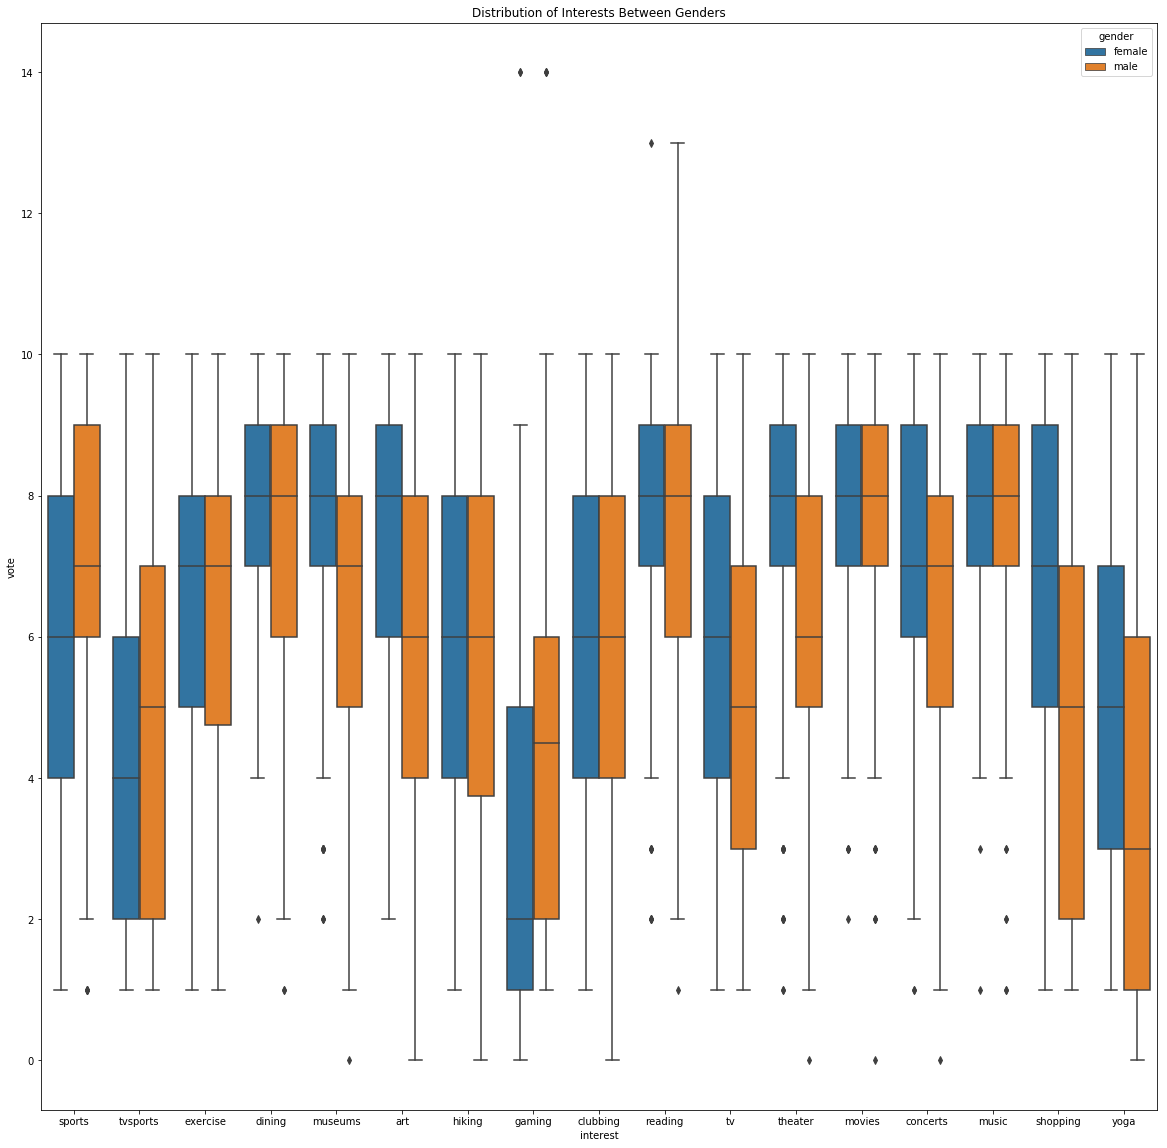

In [117]:
plt.figure(figsize=(20,20))
plt.title('Distribution of Interests Between Genders')

sns.boxplot(x='interest', y='vote', data=melted_data, hue='gender')

In [118]:
#Importance of race and religion between races
melted_data_race = pd.melt(cut_data, ['iid', 'gender','idg', 'pid', 'match', 'samerace', 'age_o', 'race_o',
                             'dec_o', 'field_cd', 'age', 'race', 'from', 'goal', 'date',
                             'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 
                             'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies',
                             'concerts', 'music', 'shopping', 'yoga', 'dec', 'attr', 'sinc', 'intel', 'fun', 
                             'amb', 'like', 'prob', 'met'], var_name='importance')

melted_data_race = melted_data_race.rename(columns={'value' : 'rating'})
melted_data_race.reset_index(drop=True)
melted_data_race.tail()

,iid,gender,idg,pid,match,samerace,age_o,race_o,dec_o,field_cd,...,attr,sinc,intel,fun,amb,like,prob,met,importance,rating
1053,548,male,36,509.0,1,0,28.0,asian,1,8.0,...,5.0,5.0,7.0,7.0,7.0,6.0,7.0,0.0,imprelig,8.0
1054,549,male,38,509.0,0,0,28.0,asian,0,8.0,...,1.0,6.0,6.0,4.0,6.0,3.0,2.0,0.0,imprelig,3.0
1055,550,male,40,509.0,0,0,28.0,asian,1,8.0,...,7.0,6.0,7.0,5.0,7.0,5.0,2.0,0.0,imprelig,6.0
1056,551,male,42,509.0,0,0,28.0,asian,0,8.0,...,5.0,7.0,8.0,7.0,8.0,7.0,5.0,0.0,imprelig,1.0
1057,552,male,44,509.0,1,0,28.0,asian,1,18.0,...,7.0,7.0,9.0,8.0,9.0,8.0,5.0,0.0,imprelig,1.0


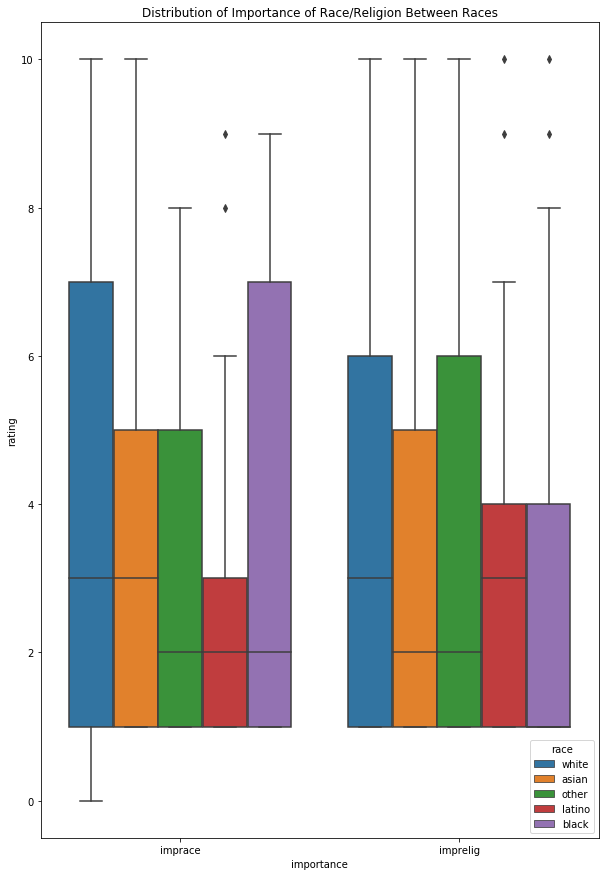

In [119]:
plt.figure(figsize=(10,15))
plt.title('Distribution of Importance of Race/Religion Between Races')

sns.boxplot(x='importance', y='rating', data=melted_data_race, hue='race')

In [120]:
#Partners chosen vs race of partners
cut_data_yes = cut_data[cut_data['dec'] == 1]
cut_data_no  = cut_data[cut_data['dec'] == 0]

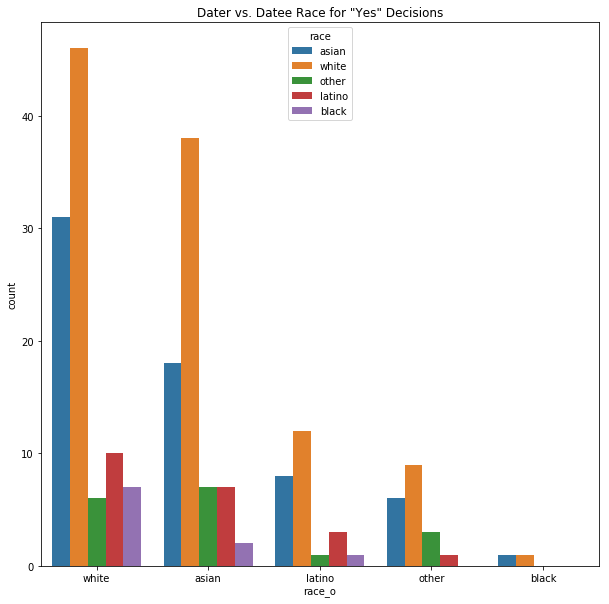

In [121]:
plt.figure(figsize=(10,10))
plt.title('Dater vs. Datee Race for "Yes" Decisions')

sns.countplot(x='race_o', data=cut_data_yes, hue='race')

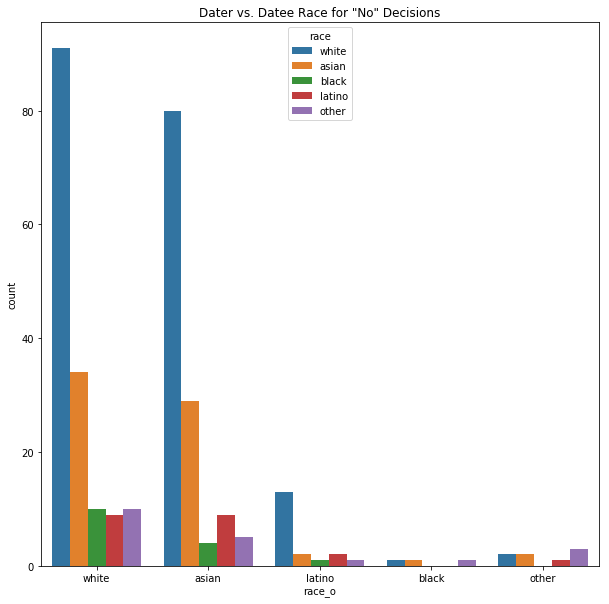

In [122]:
plt.figure(figsize=(10,10))
plt.title('Dater vs. Datee Race for "No" Decisions')

sns.countplot(x='race_o', data=cut_data_no, hue='race')

In [123]:
df = pd.read_csv("D:/Dating Data.csv", encoding="ISO-8859-1")
input_vars = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']

In [124]:
# female model
f = df.loc[df.gender == 0, :]
f_data = f.copy()
f_data = f.dropna(subset=input_vars)
f_model = sm.OLS(f_data.dec, sm.add_constant(f_data.loc[:, input_vars]))
f_results = f_model.fit()
f_results.params
f_results.pvalues  
# all p-values are less than 0.05 which means all of features are significant in the model.

const    3.024043e-28
attr     3.585211e-24
sinc     4.757680e-06
intel    1.412131e-01
fun      1.578416e-04
amb      5.948697e-05
shar     4.867489e-07
like     5.096468e-21
prob     1.299559e-06
dtype: float64

In [125]:
# Now let's rank the features based on their importance in the model using RFE method, for women.
estimator = SVC(kernel= "linear", C=0.1)
selector = RFE(estimator,1)
cfl=selector.fit(f_data.loc[:, input_vars], f_data.dec)
ranking_f=cfl.ranking_
feature_ranking_f=zip(ranking_f, input_vars)
list(feature_ranking_f)

[(2, 'attr'),
 (6, 'sinc'),
 (8, 'intel'),
 (3, 'fun'),
 (4, 'amb'),
 (5, 'shar'),
 (1, 'like'),
 (7, 'prob')]

In [126]:
# male model
m = df.loc[df.gender == 1, :]
m_data = m.copy()
m_data = m_data.dropna(subset=input_vars)
m_model = sm.OLS(m_data.dec, sm.add_constant(m_data.loc[:, input_vars]))
m_results = m_model.fit()
m_results.params
m_results.pvalues

const    4.115154e-31
attr     1.052945e-56
sinc     6.215313e-11
intel    1.436562e-01
fun      1.034067e-03
amb      3.929744e-05
shar     1.463562e-02
like     2.415622e-43
prob     6.211989e-11
dtype: float64

In [127]:
# feature ranking for male participants.
estimator = SVC(kernel= "linear", C=0.1)
selector = RFE(estimator,1)
cfl=selector.fit(m_data.loc[:, input_vars], m_data.dec)
ranking_m=cfl.ranking_
feature_ranking_m=zip(ranking_m, input_vars)
list(feature_ranking_m)
# you can see that being funny is more important for women than man in selecting a partner!  
# Being sincere on the other hand is more important to men than women. 

[(2, 'attr'),
 (3, 'sinc'),
 (8, 'intel'),
 (5, 'fun'),
 (6, 'amb'),
 (7, 'shar'),
 (1, 'like'),
 (4, 'prob')]